In [1]:
import pandas as pd
import sqlite3 
import pytz
import urllib
import datetime
from IPython.display import Image, display, HTML
tz = pytz.timezone('UTC')
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)

In [2]:
def cnts_pcts(series):
    cnts = series.value_counts()
    pcts = 100*series.value_counts(normalize=True).round(5)
    combo = pd.concat({"Count":cnts, "Percent": pcts}, axis=1)
    return(combo)


In [3]:
con = sqlite3.connect('/home/malcolm/petfinder/data/petfinder.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dog_10475_30mi',), ('cat_10475_30mi',), ('Organizations',), ('Dog_Image_Status',)]


In [4]:
cursor.execute("""
select min(date_saved), max(date_saved), count(*)
from dog_10475_30mi
""").fetchall()

[('2021-07-03', '2021-11-06', 296840)]

In [18]:
dates_cnts = cursor.execute("""
select date_saved, count(*) as cnt_dogs, count(distinct id) as cnt_uniqueids
from dog_10475_30mi
group by date_saved
order by 1 desc
limit 100
""").fetchall()
dates_cnts

[('2021-11-06', 2432, 2428),
 ('2021-11-05', 2426, 2422),
 ('2021-11-04', 2411, 2411),
 ('2021-11-03', 2376, 2373),
 ('2021-11-02', 2383, 2383),
 ('2021-11-01', 2355, 2355),
 ('2021-10-31', 2384, 2384),
 ('2021-10-30', 2448, 2448),
 ('2021-10-29', 2415, 2412),
 ('2021-10-28', 2411, 2411),
 ('2021-10-27', 2319, 2318),
 ('2021-10-26', 2298, 2298),
 ('2021-10-25', 2305, 2304),
 ('2021-10-24', 2320, 2318),
 ('2021-10-23', 2333, 2329),
 ('2021-10-22', 2339, 2336),
 ('2021-10-21', 2334, 2330),
 ('2021-10-20', 2318, 2318),
 ('2021-10-19', 2319, 2319),
 ('2021-10-18', 2320, 2318),
 ('2021-10-17', 2321, 2319),
 ('2021-10-16', 2403, 2400),
 ('2021-10-15', 2416, 2416),
 ('2021-10-14', 2394, 2394),
 ('2021-10-13', 2370, 2368),
 ('2021-10-12', 2347, 2347),
 ('2021-10-11', 2350, 2350),
 ('2021-10-10', 2383, 2382),
 ('2021-10-09', 2438, 2436),
 ('2021-10-08', 2460, 2453),
 ('2021-10-07', 2435, 2433),
 ('2021-10-06', 2422, 2420),
 ('2021-10-05', 2396, 2396),
 ('2021-10-04', 2369, 2368),
 ('2021-10-03'

In [6]:
cursor.execute("pragma table_info(dog_10475_30mi)").fetchall()

[(0, 'id', 'INTEGER', 0, None, 0),
 (1, 'organization_id', 'TEXT', 0, None, 0),
 (2, 'url', 'TEXT', 0, None, 0),
 (3, 'type', 'TEXT', 0, None, 0),
 (4, 'species', 'TEXT', 0, None, 0),
 (5, 'age', 'TEXT', 0, None, 0),
 (6, 'gender', 'TEXT', 0, None, 0),
 (7, 'size', 'TEXT', 0, None, 0),
 (8, 'coat', 'TEXT', 0, None, 0),
 (9, 'tags', 'TEXT', 0, None, 0),
 (10, 'name', 'TEXT', 0, None, 0),
 (11, 'description', 'TEXT', 0, None, 0),
 (12, 'organization_animal_id', 'TEXT', 0, None, 0),
 (13, 'photos', 'TEXT', 0, None, 0),
 (14, 'videos', 'TEXT', 0, None, 0),
 (15, 'status', 'TEXT', 0, None, 0),
 (16, 'status_changed_at', 'TEXT', 0, None, 0),
 (17, 'published_at', 'TEXT', 0, None, 0),
 (18, 'distance', 'REAL', 0, None, 0),
 (19, 'breeds.primary', 'TEXT', 0, None, 0),
 (20, 'breeds.secondary', 'TEXT', 0, None, 0),
 (21, 'breeds.mixed', 'INTEGER', 0, None, 0),
 (22, 'breeds.unknown', 'INTEGER', 0, None, 0),
 (23, 'colors.primary', 'TEXT', 0, None, 0),
 (24, 'colors.secondary', 'TEXT', 0, None, 

In [7]:
# cursor.execute("""
# select organization_id, count(*)
# from dog_10475_30mi
# order by 2 desc 
# """).fetchall()

cursor.execute("""
select date_saved, organization_id
, count(*) as cnt_dogs, count(distinct id) as cnt_uniqueids
from dog_10475_30mi
group by date_saved
order by 1, 2 desc
""").fetchall()

[('2021-07-03', 'NY769', 2284, 2284),
 ('2021-07-04', 'NY769', 2282, 2274),
 ('2021-07-05', 'NY769', 2300, 2299),
 ('2021-07-06', 'NY769', 2282, 2280),
 ('2021-07-07', 'NY769', 2099, 2098),
 ('2021-07-08', 'NY769', 2089, 2087),
 ('2021-07-09', 'NY769', 2331, 2330),
 ('2021-07-10', 'NY769', 2345, 2345),
 ('2021-07-11', 'NY769', 2313, 2311),
 ('2021-07-12', 'NY769', 2280, 2279),
 ('2021-07-13', 'NY769', 2292, 2292),
 ('2021-07-14', 'NY769', 2319, 2318),
 ('2021-07-15', 'NY769', 2349, 2347),
 ('2021-07-16', 'NY769', 2390, 2389),
 ('2021-07-17', 'NY769', 2401, 2401),
 ('2021-07-18', 'NY769', 2350, 2348),
 ('2021-07-19', 'NY769', 2337, 2337),
 ('2021-07-20', 'NY769', 2348, 2345),
 ('2021-07-21', 'NY769', 2392, 2389),
 ('2021-07-22', 'NY769', 2418, 2417),
 ('2021-07-23', 'NY769', 2434, 2434),
 ('2021-07-24', 'NY769', 2443, 2443),
 ('2021-07-25', 'NY769', 2375, 2375),
 ('2021-07-26', 'NY769', 2342, 2341),
 ('2021-07-27', 'NY769', 2366, 2366),
 ('2021-07-28', 'NY769', 2369, 2368),
 ('2021-07-2

In [20]:
cursor.execute("select * from Organizations limit 10").fetchall()

[('NY1445',
  'Camp Happy Tails NYC Inc',
  'camphappytailsnyc@gmail.com',
  '(516) 521-5191',
  'https://www.petfinder.com/member/us/ny/fresh-meadows/camp-happy-tails-nyc-inc-ny1445/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c',
  None,
  None,
  "0    [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1    [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2    [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3                                                   []\n4    [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n                           ...                        \n5    [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n6    [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n7    [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n8    [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n9                                                   []\nName: photos, Length: 264, dtype: object",
  None,
  None,
  None,
  'Fresh Meadows',
  'NY',
  '11365',
  'US',
  None,
  None,
 

In [21]:
cursor.execute("pragma table_info(Organizations)").fetchall()

[(0, 'id', 'TEXT', 0, None, 0),
 (1, 'name', 'TEXT', 0, None, 0),
 (2, 'email', 'TEXT', 0, None, 0),
 (3, 'phone', 'TEXT', 0, None, 0),
 (4, 'url', 'TEXT', 0, None, 0),
 (5, 'website', 'TEXT', 0, None, 0),
 (6, 'mission_statement', 'TEXT', 0, None, 0),
 (7, 'photos', 'TEXT', 0, None, 0),
 (8, 'distance', 'TEXT', 0, None, 0),
 (9, 'address.address1', 'TEXT', 0, None, 0),
 (10, 'address.address2', 'TEXT', 0, None, 0),
 (11, 'address.city', 'TEXT', 0, None, 0),
 (12, 'address.state', 'TEXT', 0, None, 0),
 (13, 'address.postcode', 'TEXT', 0, None, 0),
 (14, 'address.country', 'TEXT', 0, None, 0),
 (15, 'hours.monday', 'TEXT', 0, None, 0),
 (16, 'hours.tuesday', 'TEXT', 0, None, 0),
 (17, 'hours.wednesday', 'TEXT', 0, None, 0),
 (18, 'hours.thursday', 'TEXT', 0, None, 0),
 (19, 'hours.friday', 'TEXT', 0, None, 0),
 (20, 'hours.saturday', 'TEXT', 0, None, 0),
 (21, 'hours.sunday', 'TEXT', 0, None, 0),
 (22, 'adoption.policy', 'TEXT', 0, None, 0),
 (23, 'adoption.url', 'TEXT', 0, None, 0),
 (

## One Day 

In [24]:
df = pd.read_sql(""" 
select dogs.*, orgs.name as org_name 
from dog_10475_30mi dogs
left join organizations orgs
on dogs.organization_id = orgs.id
where date_saved = '2021-08-01'
""", con)
df

,id,organization_id,url,type,species,age,gender,size,coat,tags,name,description,organization_animal_id,photos,videos,status,status_changed_at,published_at,distance,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,colors.primary,colors.secondary,colors.tertiary,attributes.spayed_neutered,attributes.house_trained,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full,contact.email,contact.phone,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,primary_photo_cropped,date_saved,org_name
0,52535728,NY1274,https://www.petfinder.com/dog/soybean-tx-52535728/ny/new-york/rescue-dogs-rock-nyc-ny1274/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c,Dog,Dog,Baby,Male,Medium,None,0 []\n1 []\n2 []\n3 ...,Soybean (TX),You can fill out an adoption application online on our official website.\nSoybean (TX) is male Labrador Retriever mix rescued...,17072986-7992,0 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3 [{'small': ...,0 []\n1 []\n2 []\n3 ...,adoptable,2021-08-01T01:23:46+0000,2021-08-01T01:23:46+0000,9.6228,Labrador Retriever,None,1,0,None,None,None,0,0,None,0,1,1.0,1.0,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535728/1/?bust=1627781631&width=300,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535728/1/?bust=1627781631&width=450,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535728/1/?bust=1627781631&width=600,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535728/1/?bust=1627781631,info@rescuedogsrocknyc.org,None,None,None,New York,NY,10075,US,52535728,dog,None,2021-08-01,Rescue Dogs Rock NYC
1,52535672,NY1274,https://www.petfinder.com/dog/mickey-tx-52535672/ny/new-york/rescue-dogs-rock-nyc-ny1274/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c,Dog,Dog,Baby,Male,Small,None,0 []\n1 []\n2 []\n3 ...,Mickey (TX),You can fill out an adoption application online on our official website.\nMickey (TX) is male Shih Tzu mix rescued...,17072839-7991,0 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3 [{'small': ...,0 []\n1 []\n2 []\n3 ...,adoptable,2021-08-01T01:09:08+0000,2021-08-01T01:09:08+0000,9.6228,Shih Tzu,None,1,0,None,None,None,0,0,None,0,1,1.0,1.0,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535672/1/?bust=1627780761&width=300,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535672/1/?bust=1627780761&width=450,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535672/1/?bust=1627780761&width=600,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535672/1/?bust=1627780761,info@rescuedogsrocknyc.org,None,None,None,New York,NY,10075,US,52535672,dog,None,2021-08-01,Rescue Dogs Rock NYC
2,52535630,NY1274,https://www.petfinder.com/dog/chiquita-tx-52535630/ny/new-york/rescue-dogs-rock-nyc-ny1274/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c,Dog,Dog,Adult,Female,Small,None,0 []\n1 []\n2 []\n3 ...,Chiquita (TX),You can fill out an adoption application online on our official website.\nChiquita (TX) is female Chihuahua mix rescued in...,17072785-7990,0 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3 [{'small': ...,0 []\n1 []\n2 []\n3 ...,adoptable,2021-08-01T00:53:53+0000,2021-08-01T00:53:53+0000,9.6228,Chihuahua,None,1,0,None,None,None,0,0,None,0,1,1.0,1.0,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535630/1/?bust=1627779840&width=300,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52535630/1/?bust=1627779840&width=450,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/525

In [33]:
n_dogs_without_orgs = df['org_name'].isna().sum()
n_missing_orgs = df[df['org_name'].isna()]['organization_id'].nunique()
print(f"Dogs without orgs, {n_dogs_without_orgs}, Missing Orgs {n_missing_orgs}")

Dogs without orgs, 209, Missing Orgs 53


In [34]:
df['org_name'].value_counts()

Rescue Dogs Rock NYC                        248
Second Chance Rescue                        144
Ruff House Rescue                            95
Paws Crossed Animal Rescue Inc.              63
Town of Hempstead Animal Shelter             46
                                           ... 
The Sato Project                              1
Hudson Haven Dog Rescue                       1
Metropolitan Maltese Rescue                   1
Kinnelon Volunteer Animal Shelter             1
Australian Cattle Dog Rescue Association      1
Name: org_name, Length: 145, dtype: int64

In [35]:
df['breeds.primary'].value_counts()

Labrador Retriever                          326
Pit Bull Terrier                            289
Hound                                       154
Mixed Breed                                 150
American Staffordshire Terrier              140
                                           ... 
West Highland White Terrier / Westie          1
Lancashire Heeler                             1
Caucasian Sheepdog / Caucasian Ovtcharka      1
Spitz                                         1
Saluki                                        1
Name: breeds.primary, Length: 141, dtype: int64

## Find North Shore  

(via Ellie) 

In [36]:
df[df['name'] == 'Ellie']

,id,organization_id,url,type,species,age,gender,size,coat,tags,name,description,organization_animal_id,photos,videos,status,status_changed_at,published_at,distance,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,colors.primary,colors.secondary,colors.tertiary,attributes.spayed_neutered,attributes.house_trained,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full,contact.email,contact.phone,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,primary_photo_cropped,date_saved,org_name
288,52472607,NY1358,https://www.petfinder.com/dog/ellie-52472607/ny/thornwood/wagging-tails-dog-rescue-ny-ny1358/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c,Dog,Dog,Adult,Female,Small,Short,0 []\n1 []\n2 []\n3 ...,Ellie,Ellie is a friendly girl who loves everyone. She is about 8 years old and 15lbs. She appears to be...,None,0 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3 [{'small': ...,0 []\n1 []\n2 []\n3 ...,adoptable,2021-07-29T20:19:22+0000,2021-07-26T00:56:52+0000,17.0680,Poodle,Shih Tzu,1,0,White / Cream,Black,None,1,1,None,0,1,1.0,1.0,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52472607/2/?bust=1627260998&width=300,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52472607/2/?bust=1627260998&width=450,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52472607/2/?bust=1627260998&width=600,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52472607/2/?bust=1627260998,info@waggingtailsdogrescueny.com,None,None,None,Thornwood,NY,10594,US,52472607,dog,None,2021-08-01,Wagging Tails Dog Rescue NY
450,52428810,NY514,https://www.petfinder.com/dog/ellie-52428810/ny/port-washington/north-shore-animal-league-america-ny514/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c,Dog,Dog,Adult,Female,Medium,None,0 []\n1 []\n2 []\n3 ...,Ellie,"Happy dog! That will be your first thought when you meet Ellie. This young adult, Shepherd/Hound mix has lots of...",0c5f0b4b-535b-46be-aa38-9fcb4b603c89,0 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3 [{'small': ...,0 []\n1 []\n2 []\n3 ...,adoptable,2021-07-21T19:02:14+0000,2021-07-21T19:02:14+0000,8.1201,Mixed Breed,None,0,0,None,None,None,0,0,None,0,0,NaN,NaN,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52428810/1/?bust=1627637050&width=300,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52428810/1/?bust=1627637050&width=450,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52428810/1/?bust=1627637050&width=600,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/52428810/1/?bust=1627637050,adoptions@animalleague.org,(516) 883-7575,25 Davis Avenue,None,Port Washington,NY,11050,US,52428810,dog,None,2021-08-01,North Shore Animal League America


North Shore is NY514

In [12]:
north_shore = df[df['organization_id'] == 'NY514']
print(north_shore.shape)
north_shore = north_shore.sort_values('published_at')
north_shore

(38, 50)


,id,organization_id,url,type,species,age,gender,size,coat,tags,name,description,organization_animal_id,photos,videos,status,status_changed_at,published_at,distance,breeds.primary,breeds.secondary,breeds.mixed,breeds.unknown,colors.primary,colors.secondary,colors.tertiary,attributes.spayed_neutered,attributes.house_trained,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full,contact.email,contact.phone,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,primary_photo_cropped,date_saved
2185,46388592,NY514,https://www.petfinder.com/dog/gia-46388592/ny/port-washington/north-shore-animal-league-america-ny514/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c,Dog,Dog,Senior,Female,Large,None,0 []\n1 []\n2 []\n3 ...,Gia,"Gia is a big girl with an even bigger heart. This Anatolian Shepherd was rescued from Tennessee, but is looking...",bdff4a89-4afc-419a-bbb8-ed6601fe96a6,0 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3 [{'small': ...,0 []\n1 []\n2 []\n3 ...,adoptable,2019-10-26T09:00:44+0000,2019-10-26T09:00:44+0000,8.1201,Mixed Breed,None,0,0,"Tricolor (Brown, Black, & White)",None,None,1,0,None,0,0,NaN,NaN,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46388592/1/?bust=1627671641&width=300,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46388592/1/?bust=1627671641&width=450,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46388592/1/?bust=1627671641&width=600,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46388592/1/?bust=1627671641,adoptions@animalleague.org,(516) 883-7575,25 Davis Avenue,None,Port Washington,NY,11050,US,46388592,dog,None,2021-08-01
2182,46519064,NY514,https://www.petfinder.com/dog/max-46519064/ny/port-washington/north-shore-animal-league-america-ny514/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c,Dog,Dog,Senior,Male,Large,None,0 []\n1 []\n2 []\n3 ...,Max,"Max is an international rescue from Thailand looking for the quiet life. He dreams of a suburban home, with a...",a81511b4-63e3-48f2-81e3-45f71bda57d3,0 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3 [{'small': ...,0 []\n1 []\n2 []\n3 ...,adoptable,2019-11-08T19:40:14+0000,2019-11-08T19:40:14+0000,8.1201,Mixed Breed,None,1,0,None,None,None,0,0,None,0,0,NaN,NaN,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46519064/1/?bust=1627637053&width=300,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46519064/1/?bust=1627637053&width=450,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46519064/1/?bust=1627637053&width=600,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/46519064/1/?bust=1627637053,adoptions@animalleague.org,(516) 883-7575,25 Davis Avenue,None,Port Washington,NY,11050,US,46519064,dog,None,2021-08-01
2146,47745070,NY514,https://www.petfinder.com/dog/rocket-47745070/ny/port-washington/north-shore-animal-league-america-ny514/?referrer_id=a0b0e7e5-a0ff-4872-86f9-c0328ab65a7c,Dog,Dog,Adult,Male,Large,None,0 []\n1 []\n2 []\n3 ...,Rocket,"Rocket is an energetic, young Terrier/Labrador Retriever mix. He is a loving and affectionate dog, but can be nervous at...",ae44bb2c-e1cc-4cdd-9cd8-1c5691e82677,0 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n1 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n2 [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...\n3 [{'small': ...,0 []\n1 []\n2 []\n3 ...,adoptable,2020-04-02T18:42:30+0000,2020-04-02T18:42:30+0000,8.1201,Mixed Breed,None,1,0,None,None,None,1,0,None,0,0,NaN,NaN,NaN,https://dl5zpyw5k3jeb.cloudfront.net/photos/pets/47745070/1/?bust=1627671643&width=300,https://dl5zpyw5k3jeb.cloudf

In [13]:
base_path = '/mnt/volume-nyc3-01/Petfinder/Dogs/'

In [16]:
n = 1
temp = north_shore.iloc[n]
temp_path = temp['primary_photo_cropped.large']
save_path = base_path + temp['date_saved'] + '_' + temp['name'] + '_' + str(temp['id']) + '.jpg'
save_path

'/mnt/volume-nyc3-01/Petfinder/Dogs/2021-08-01_Max_46519064.jpg'

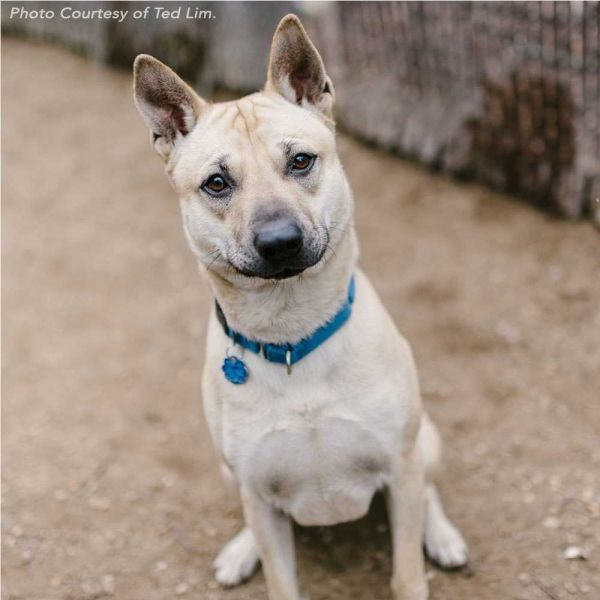

In [17]:
urllib.request.urlretrieve(temp_path, save_path)
Image(save_path)